In [2]:
import pandas as pd
import numpy as np

In [3]:
app = pd.read_csv('../data/application_train.csv')
bure = pd.read_csv('../data/bureau.csv')
bure_b = pd.read_csv('../data/bureau_balance.csv')

Random under-sampling:
0    24825
1    24825
Name: TARGET, dtype: int64


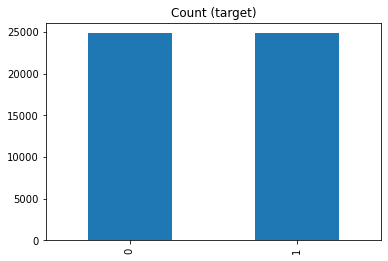

In [4]:
count_class_0, count_class_1 = app.TARGET.value_counts()
df_class_0 = app[app['TARGET'] == 0]
df_class_1 = app[app['TARGET'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
app = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(app.TARGET.value_counts())

app.TARGET.value_counts().plot(kind='bar', title='Count (target)');

In [3]:
print(bure.columns)
print()
print(bure_b.columns)

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')


In [4]:
bure_b[bure_b.STATUS=='X']

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
11,5715448,-11,X
12,5715448,-12,X
13,5715448,-13,X
20,5715448,-20,X
21,5715448,-21,X
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [5]:
df=pd.merge(app,bure,how='left',  left_on= 'SK_ID_CURR', right_on='SK_ID_CURR')

In [6]:
df = pd.merge(df,pd.get_dummies(bure_b), how = 'left', left_on= 'SK_ID_BUREAU', right_on='SK_ID_BUREAU')

In [30]:
best_features = df.corr()['TARGET'].abs().sort_values(ascending=False)[1:11].keys()
best_features

Index(['EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_CREDIT',
       'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'DAYS_EMPLOYED'],
      dtype='object')

In [31]:
best_features.drop(['EXT_SOURCE_1'])

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_CREDIT',
       'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'DAYS_EMPLOYED'],
      dtype='object')

In [32]:
(df[best_features].isna().sum())/df.shape[0]

EXT_SOURCE_3                   0.030648
EXT_SOURCE_1                   0.502249
EXT_SOURCE_2                   0.000156
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
REGION_RATING_CLIENT           0.000000
DAYS_CREDIT                    0.003355
REG_CITY_NOT_WORK_CITY         0.000000
FLAG_EMP_PHONE                 0.000000
DAYS_EMPLOYED                  0.000000
dtype: float64